В данной заметке мы построим модель GAN, используя сверточные слои

# Подключение необходимых модулей

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torch.utils.data import Subset

import matplotlib.pyplot as plt
%matplotlib inline

from ConvGANcfg import device, BATCH, WORKERS, NOISE_DIM, EPOCHS, DEBUG, lr, beta1
from ConvGAN import Generator, Discriminator, train_GAN

print(f'Selected device is {device}')

Selected device is cuda:0


# Загрузка датасета MNIST

In [2]:
transform = transforms.Compose([transforms.Resize(32), transforms.ToTensor()])
dataset = MNIST(root='.', transform=transform, download=True)
dataloader = DataLoader(dataset=dataset, batch_size=BATCH, shuffle=True, num_workers=WORKERS)

## Изобразим 16 случайных изображений из выборки

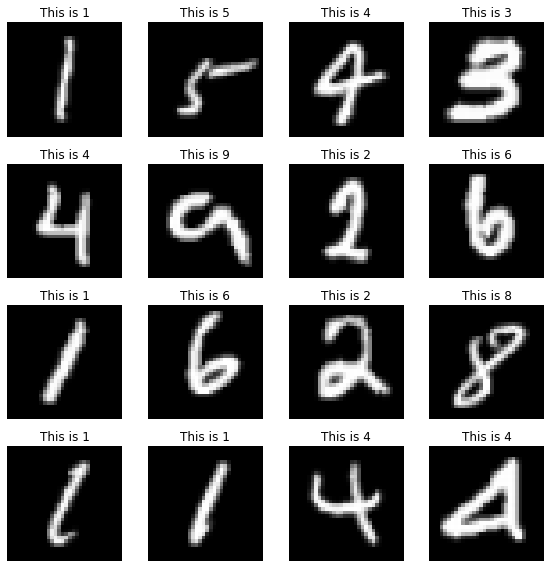

In [3]:
images, labels = next(iter(dataloader))
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(8,8))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(images[i].reshape(32,32), cmap='gray')
    ax.axis('off')
    ax.set_title(f'This is {labels[i]}')
plt.tight_layout()
plt.show()

# Сверточная генеративно-состязательная сеть (GAN) на датасете MNIST

## Определение модели

Инициализируем веса модели случайными значениями из нормального распределения с параметрами $\mu=0$ и $\sigma=0.02$.

In [4]:
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

In [10]:
netG = Generator().to(device)
netG.apply(weights_init)

netD = Discriminator().to(device)
netD.apply(weights_init)

optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))

criterion = nn.BCELoss()

## Цикл обучения

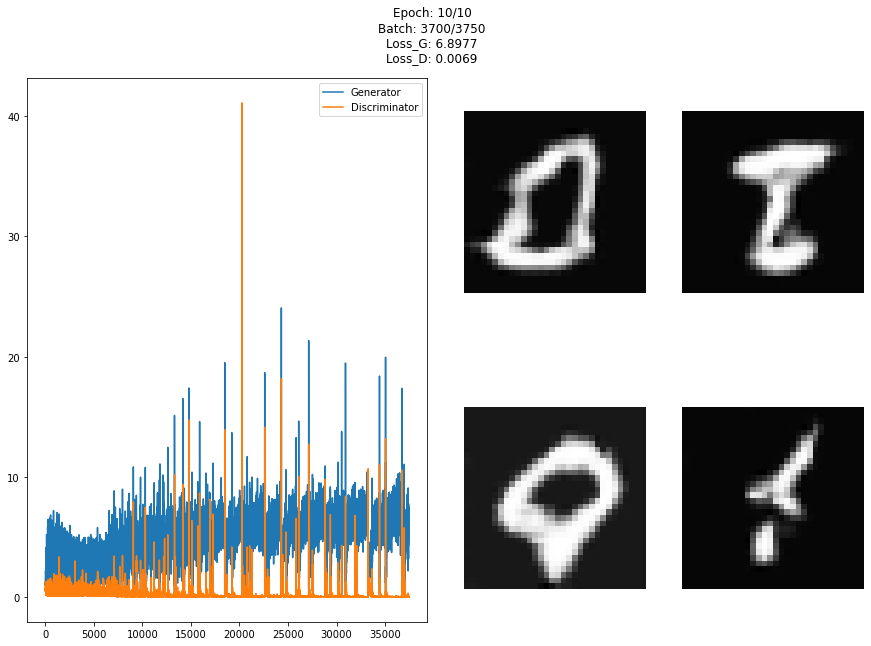

In [11]:
train_GAN(netG, netD, criterion, optimizerG, optimizerD, dataloader, 10, DEBUG)

Сохраним веса модели

In [12]:
# save state_dict of generator
torch.save(netG.state_dict(), './weights/conv_generator.pth')

## Визуализация 100 результатов семплирования из гауссовского шума

Загрузка весов генератора

In [5]:
netG = Generator().to(device)
netG.load_state_dict(torch.load('./weights/conv_generator.pth'))

<All keys matched successfully>

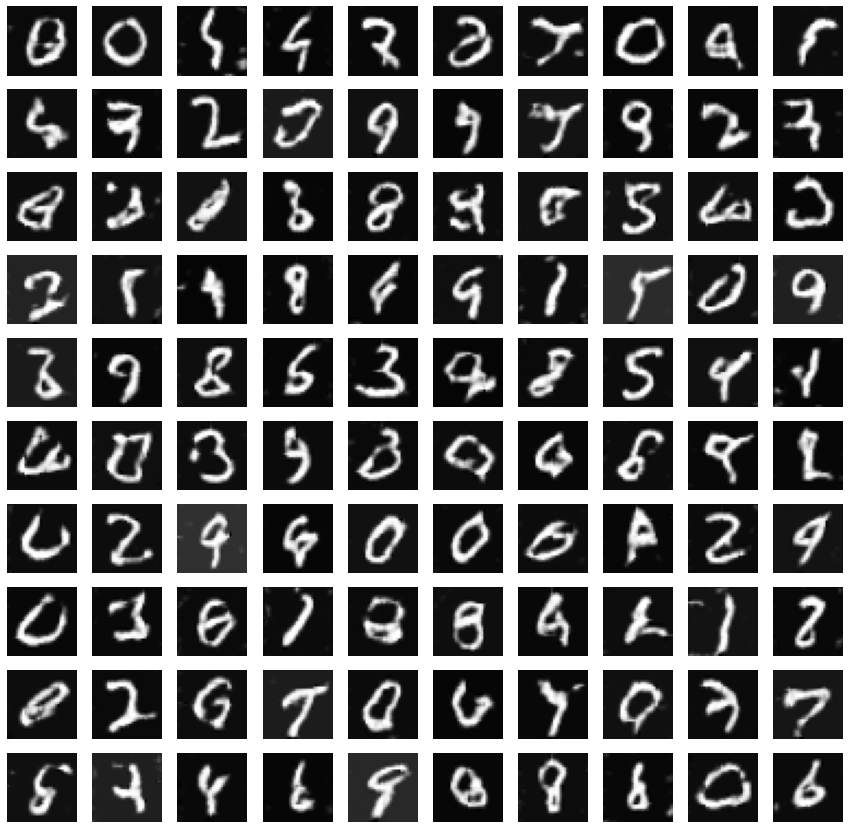

In [6]:
netG.plot_results()

# Вывод
    Как видно, по сравнению с предыдущими моделями, результаты получились более реалистичными. Это ожидаемый эффект, так как сверточные слои позволяют извлекать более сложные признаки из изображений.
   